Help on MatterTransferData in module camb.results object:

class MatterTransferData(builtins.object)
 |  MatterTransferData is the base class for storing matter power transfer function data for various q values.
 |  In a flat universe q=k, in a closed universe q is quantized.
 |  
 |  To get an instance of this data, call :meth:`.results.CAMBdata.get_matter_transfer_data`.
 |  
 |  For a description of the different Transfer_xxx outputs (and 21cm case) see :ref:`transfer-variables`; the
 |  array is indexed by index+1 given by:
 |  
 |  - Transfer_kh = 1 (k/h)
 |  - Transfer_cdm = 2 (cdm)
 |  - Transfer_b = 3 (baryons)
 |  - Transfer_g = 4 (photons)
 |  - Transfer_r = 5 (massless neutrinos)
 |  - Transfer_nu = 6 (massive neutrinos)
 |  - Transfer_tot = 7 (total matter)
 |  - Transfer_nonu = 8 (total matter excluding neutrinos)
 |  - Transfer_tot_de = 9 (total including dark energy perturbations)
 |  - Transfer_Weyl = 10 (Weyl potential)
 |  - Transfer_Newt_vel_cdm = 11 (Newtonian CDM v

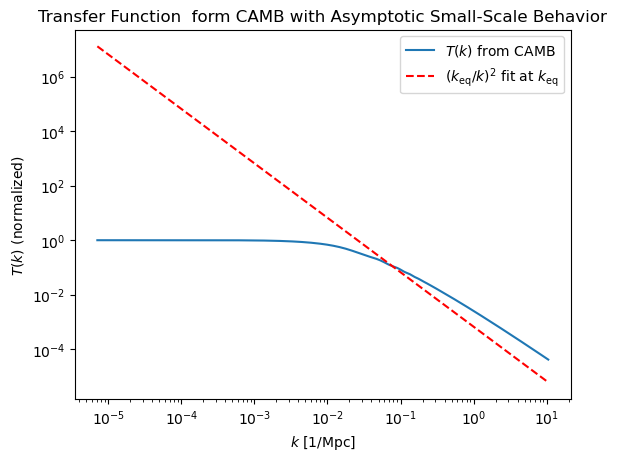

In [47]:
#Transfer function Chapter5 Fig. 5.1
import camb
import numpy as np
import matplotlib.pyplot as plt

# Set up parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
pars.set_matter_power(redshifts=[0], kmax=10.0)
pars.WantTransfer = True
pars.Transfer.output = 'delta_tot'  # total matter
pars.Transfer.kmax = 10.0

# Run CAMB
results = camb.get_results(pars)
transfer_data = results.get_matter_transfer_data()
# Get the index for z = 0 (you must know it from the setup)
z_index = 0
help(transfer_data)
# Get k = q array (in flat universe, q ≡ k)
k = transfer_data.q  # shape: (nq,)

# Get the total matter transfer function at z_index
T_k = transfer_data.transfer_z('delta_tot', z_index)

# Normalize if needed
T_k /= T_k[0]

# Plot
k_eq = 0.01  # You can adjust based on cosmology

# Find index where k ~ k_eq
i_eq = np.argmin(np.abs(k - k_eq))

# Compute (k_eq/k)^2 and scale it to match T_k at k = k_eq
asymptotic = (k_eq / k)**2
asymptotic *= 10*T_k[i_eq] / asymptotic[i_eq]  # scale to match T_k at k_eq

# Plot
plt.figure()
plt.loglog(k, T_k, label=r'$T(k)$ from CAMB')
plt.loglog(k, asymptotic, '--', color='red', label=r'$(k_{\rm eq}/k)^2$ fit at $k_{\rm eq}$')

plt.xlabel(r'$k$ [1/Mpc]')
plt.ylabel(r'$T(k)$ (normalized)')
plt.title("Transfer Function  form CAMB with Asymptotic Small-Scale Behavior")
plt.legend()
plt.savefig("Teansfer Function")
plt.show()

Note: redshifts have been re-sorted (earliest first)


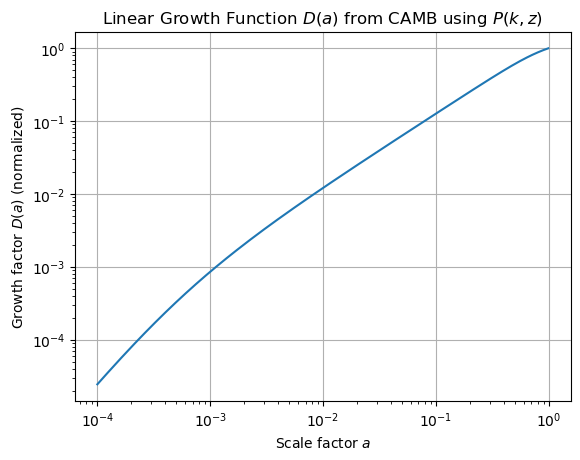

In [49]:
import camb
import numpy as np
import matplotlib.pyplot as plt

# Define redshifts and scale factors
z_vals = np.logspace(-2, 4, 200)  # z = 0.01 to 10,000
a_vals = 1 / (1 + z_vals)

# Choose a long-wavelength mode
k_target = 1e-4  # Mpc^-1

# Set CAMB parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
pars.set_matter_power(redshifts=z_vals.tolist(), kmax=0.1)

# Run CAMB and get results
results = camb.get_results(pars)

# ✅ Correct usage (no kmax here!)
k_vals, z_out, P_kz = results.get_linear_matter_power_spectrum(
    k_hunit=False, hubble_units=False
)

# Find index of k closest to k_target
k_index = np.argmin(np.abs(k_vals - k_target))

# Get δ(k, z) = sqrt[P(k, z)]
delta_k = np.sqrt(P_kz[:, k_index])

# Normalize D(a) = δ/δ(z=0)
D_vals = delta_k / delta_k[0]
a_vals = 1 / (1 + np.array(z_out))  # match z_out exactly

# Plot
plt.figure()
plt.loglog(a_vals, D_vals)
plt.xlabel(r'Scale factor $a$')
plt.ylabel(r'Growth factor $D(a)$ (normalized)')
plt.title('Linear Growth Function $D(a)$ from CAMB using $P(k,z)$')
plt.grid(True)
plt.show()


Note: redshifts have been re-sorted (earliest first)


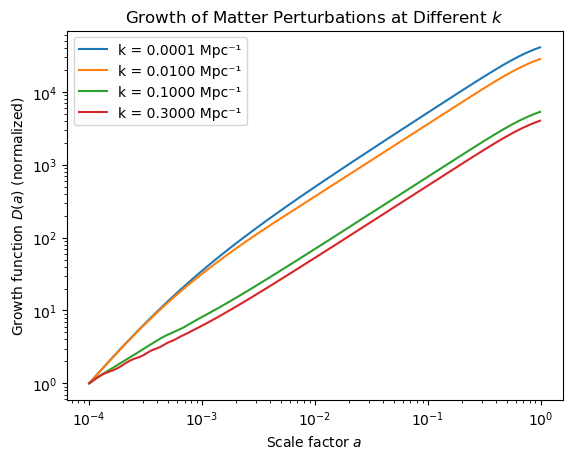

In [2]:
import camb
import numpy as np
import matplotlib.pyplot as plt

# Redshifts and scale factors
z_vals = np.logspace(-2, 4, 200)
a_vals = 1 / (1 + z_vals)

# CAMB setup
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
pars.set_matter_power(redshifts=z_vals.tolist(), kmax=1.0)

# Run CAMB
results = camb.get_results(pars)
k_vals, z_out, P_kz = results.get_linear_matter_power_spectrum(
    k_hunit=False, hubble_units=False
)

# Match a values to z_out
a_vals = 1 / (1 + np.array(z_out))

# Choose a range of k values (large and small scales)
k_modes = [1e-4, 1e-2, 1e-1, 0.3]  # Mpc^-1

# Plot growth for each mode
plt.figure()
for k_mode in k_modes:
    i_k = np.argmin(np.abs(k_vals - k_mode))
    delta_k = np.sqrt(P_kz[:, i_k])
    D_k = delta_k / delta_k[-1]
    plt.loglog(a_vals, D_k, label=f"k = {k_mode:.4f} Mpc⁻¹")

plt.xlabel(r"Scale factor $a$")
plt.ylabel(r"Growth function $D(a)$ (normalized)")
plt.title("Growth of Matter Perturbations at Different $k$")
plt.legend()

plt.savefig("D_a vs a")
plt.show()


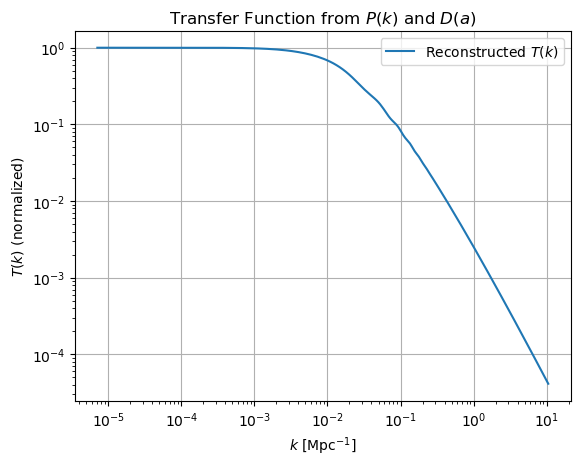

In [5]:
import camb
import numpy as np
import matplotlib.pyplot as plt

# Setup CAMB
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(As=2.1e-9, ns=0.965)
pars.set_matter_power(redshifts=[0], kmax=10.0)

results = camb.get_results(pars)
k_vals, z_out, P_kz = results.get_linear_matter_power_spectrum(
    k_hunit=False, hubble_units=False
)

# Extract power spectrum at z = 0
P_k = P_kz[0]
k_vals = np.array(k_vals)

# Reconstruct T(k)
n_s = 0.965
T_k = np.sqrt(P_k) / (k_vals ** (n_s / 2))
T_k /= T_k[0]  # normalize

# Plot
plt.figure()
plt.loglog(k_vals, T_k, label=r'Reconstructed $T(k)$')
plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'$T(k)$ (normalized)')
plt.title('Transfer Function from $P(k)$ and $D(a)$')
plt.grid(True)
plt.legend()
plt.show()


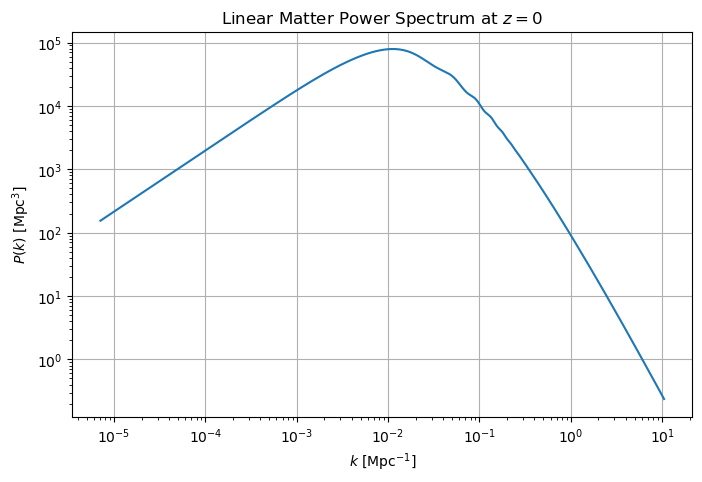

In [7]:
import camb
from camb import model, initialpower
import numpy as np
import matplotlib.pyplot as plt

# Create CAMB parameter object
pars = camb.CAMBparams()

# Set cosmology
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965, As=2.1e-9)

# Set redshifts and k-range
z = 0
kmax = 10  # in Mpc^-1
pars.set_matter_power(redshifts=[z], kmax=kmax)

# Run CAMB
results = camb.get_results(pars)

# Get P(k,z)
k_vals, z_out, P_kz = results.get_linear_matter_power_spectrum(
    k_hunit=False,      # use k in Mpc^-1
    hubble_units=False  # use P(k) in Mpc^3
)

# Extract P(k) at z=0
P_k = P_kz[0]  # because we asked for redshifts=[0]

plt.figure(figsize=(8,5))
plt.loglog(k_vals, P_k)
plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'$P(k)$ [Mpc$^3$]')
plt.title('Linear Matter Power Spectrum at $z=0$')
plt.show()


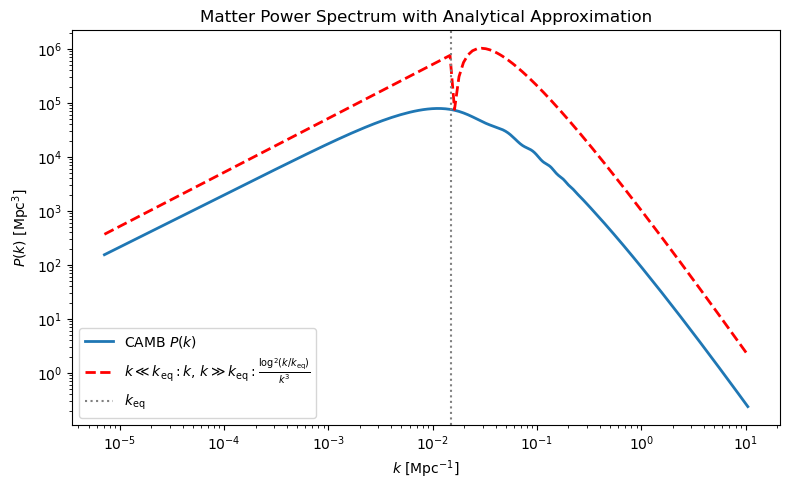

In [24]:
import camb
from camb import model, initialpower
import numpy as np
import matplotlib.pyplot as plt

# Set cosmology
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965, As=2.1e-9)
pars.set_matter_power(redshifts=[0], kmax=10.0)

# Run CAMB
results = camb.get_results(pars)
k_vals, z_out, P_kz = results.get_linear_matter_power_spectrum(k_hunit=False, hubble_units=False)
P_k = P_kz[0]

# Estimate equality scale: k_eq ≈ 0.015 Mpc⁻¹ (roughly)
k_eq = 0.015

# Initialize analytic array
P_analytic = np.zeros_like(k_vals)

# Indices for matching point
i_eq = np.argmin(np.abs(k_vals - k_eq))
k_match = k_vals[i_eq]
norm_match = P_k[i_eq]

# Build piecewise function
for i, k in enumerate(k_vals):
    if k < k_eq-0.00001:
        P_analytic[i] = k
    elif k> k_eq + 0.001:
        P_analytic[i] = (np.log(k / k_eq))**2 / k**3

# Normalize both pieces independently
# Low-k normalization
P_analytic[:i_eq+1] *= 10*norm_match / P_analytic[i_eq]

# High-k normalization (same value at matching point)
P_analytic[i_eq+1:] *= norm_match / P_analytic[i_eq+1]

# Plotting
plt.figure(figsize=(8, 5))
plt.loglog(k_vals, P_k, label="CAMB $P(k)$", lw=2)
plt.loglog(k_vals, P_analytic, 'r--', label=r"$k \ll k_{\rm eq}: k$, $k \gg k_{\rm eq}: \frac{\log^2(k/k_{\rm eq})}{k^3}$", lw=2)
plt.axvline(k_eq, color='gray', linestyle=':', label=r"$k_{\rm eq}$")

plt.xlabel(r"$k$ [Mpc$^{-1}$]")
plt.ylabel(r"$P(k)$ [Mpc$^3$]")
plt.title("Matter Power Spectrum with Analytical Approximation")
plt.legend()
plt.tight_layout()
plt.show()


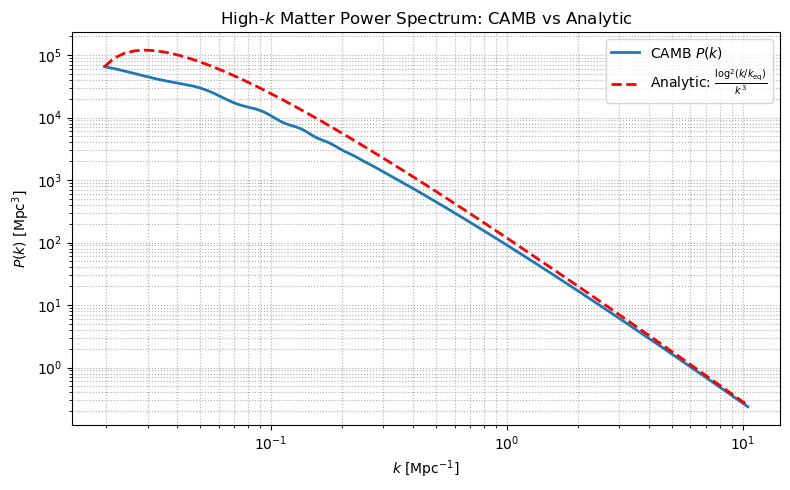

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import camb
from camb import model, initialpower

# Set CAMB parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965, As=2.1e-9)
pars.set_matter_power(redshifts=[0], kmax=10.0)

# Get CAMB results
results = camb.get_results(pars)
k_vals, z_out, P_kz = results.get_linear_matter_power_spectrum(hubble_units=False, k_hunit=False)
P_k = P_kz[0]

# Define keq and high-k region
k_eq = 0.015  # Mpc^-1
epsilon = 0.2
mask_high_k = k_vals > k_eq * (1 + epsilon)
k_high = k_vals[mask_high_k]
P_high = P_k[mask_high_k]

# Analytic high-k approximation
P_analytic = (np.log(k_high / k_eq))**2 / k_high**3

# Normalize analytic to match CAMB at high-k entry point
P_analytic *= P_high[0] / P_analytic[0]

# Plot
plt.figure(figsize=(8,5))
plt.loglog(k_high, P_high, label="CAMB $P(k)$", lw=2)
plt.loglog(k_high, P_analytic, 'r--', label=r"Analytic: $\frac{\log^2(k/k_{\rm eq})}{k^3}$", lw=2)

plt.xlabel(r"$k$ [Mpc$^{-1}$]")
plt.ylabel(r"$P(k)$ [Mpc$^3$]")
plt.title("High-$k$ Matter Power Spectrum: CAMB vs Analytic")
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


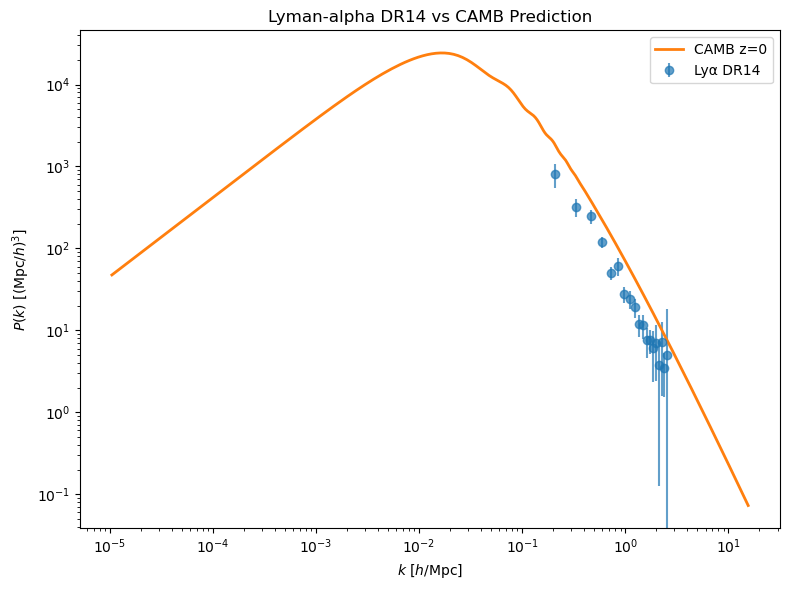

In [2]:
import camb
from camb import model, initialpower
import numpy as np
import matplotlib.pyplot as plt

# Load Lyman-alpha data (from file you already confirmed)
k_lyaf, Pk_lyaf, σ_lyaf_Pk = np.loadtxt("lyman_alpha_power_spectrum.txt", unpack=True)

# Set up CAMB
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965, As=2.1e-9)

# Match redshift to Lyman-alpha (~2.4)
z_lya = 0
pars.set_matter_power(redshifts=[z_lya], kmax=10.0)

# Run CAMB
results = camb.get_results(pars)

# Get matter power spectrum at z = 2.4 in (Mpc/h)^3 and k in h/Mpc
k_vals, z_out, P_kz = results.get_linear_matter_power_spectrum(
    k_hunit=True,
    hubble_units=True
)

# Extract P(k) at z = 2.4
P_k = P_kz[0]  # index 0 because redshifts=[2.4]

# Plot observational data and CAMB prediction
plt.figure(figsize=(8, 6))
plt.errorbar(k_lyaf, Pk_lyaf, yerr=σ_lyaf_Pk, fmt='o', label='Lyα DR14', alpha=0.7)
plt.loglog(k_vals, P_k, label='CAMB z=0', lw=2)

plt.xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$P(k)$ [$(\mathrm{Mpc}/h)^3$]')
plt.title('Lyman-alpha DR14 vs CAMB Prediction')
plt.legend()
plt.tight_layout()
plt.savefig("Matter_pow_Spec")
plt.show()
